# Business Understanding 

## Business Questions 
Question 1: What are the most popular programming languages in the continents?
Question 2: Can we predict a developer's job satisfaction in their continent Considering Professional, Continent, Expected Salary, Salary, Hours Per Week, Career Satisfaction, Job Seeking Status, Assess Job Compensation?
Question 3: Can we predict a developer's job satisfaction in their continent Considering Professional, Continent, Expected Salary, Salary, Hours Per Week, Career Satisfaction, Job Seeking Status, Assess Job Compensation?

# Dependencies

In [142]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_squared_error  

# Data Understanding
Data Understanding for the Stack Overflow 2017 dataset involves gaining insights into the structure, content, and quality of the data available.As part of the phase in the Cross-Industry Standard Process for Data Mining (CRISP-DM) framework, a widely used process model for data science and data mining projects.

## Data Collection
Collect data from the CSV files named survey-results-public.csv

In [143]:
# Read data from CSV
filepath = './dataset/survey-results-public.csv'
df = pd.read_csv(filepath)
print("Reading data completed")

Reading data completed


## Data Exploration

In [144]:
# Display dataset
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,Continent
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN,North America
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0,Europe
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN,Europe
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN,North America
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe


In [145]:
# Display datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 155 entries, Respondent to Continent
dtypes: float64(6), int64(1), object(148)
memory usage: 60.8+ MB


In [146]:
# Check duplicate
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
51387    False
51388    False
51389    False
51390    False
51391    False
Length: 51392, dtype: bool

In [147]:
# Check null data
df_null = df.isnull().mean()
print(df_null)

Respondent            0.000000
Professional          0.000000
ProgramHobby          0.000000
Country               0.000000
University            0.000000
                        ...   
QuestionsConfusing    0.330265
InterestedAnswers     0.326510
Salary                0.749163
ExpectedSalary        0.950070
Continent             0.000000
Length: 155, dtype: float64


## Descriptive Statistics

In [148]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371840,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263690
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225807
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


## Data Visualization

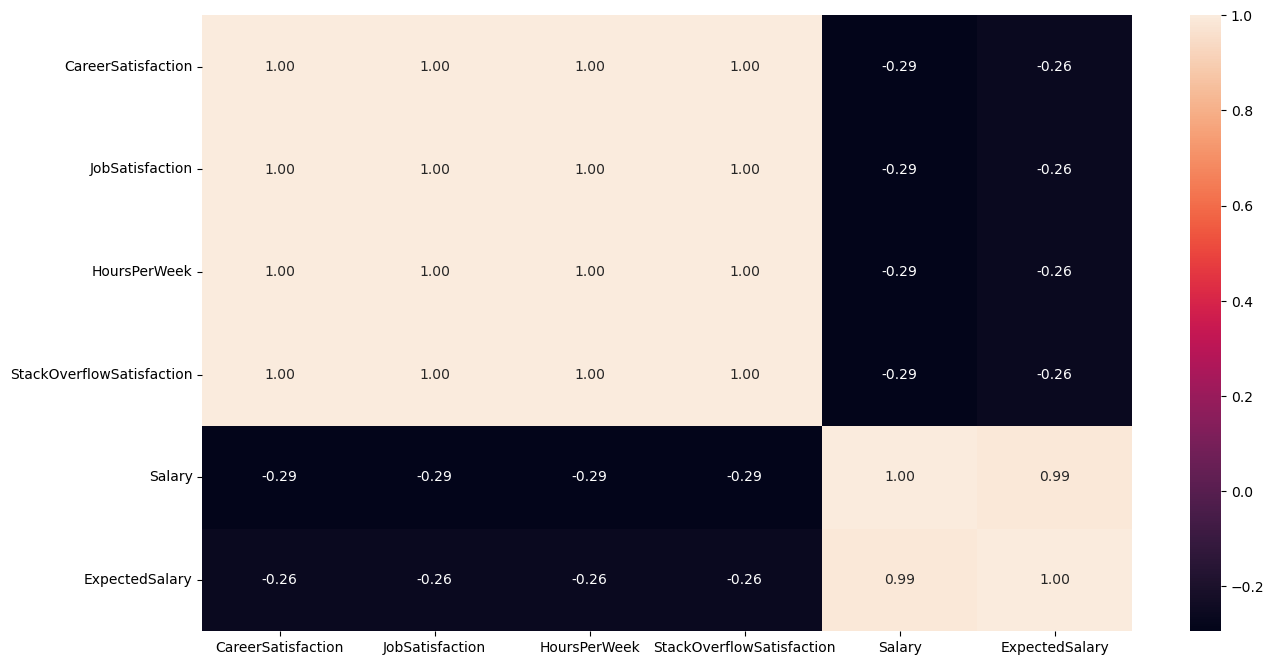

In [149]:
# Assign Variables
df_dis = df.describe()
exclude_respondent = 'Respondent'

# Drop the specified column from the DataFrame
df_excl_respondent = df_dis.drop(columns=[exclude_respondent])

def plot_correlation_heatmap(dataframe, figsize=(15, 8)):
    """
    Plot a heatmap for the correlation matrix of the specified DataFrame.

    Parameters:
    - df_excl_respondent): The DataFrame for which the correlation heatmap will be plotted.
    - figsize (tuple, optional): Figure size (width, height). Default is (15, 8).

    Returns:
    - correlation heatmap
    """
    # Set the size of the resulting figure
    plt.figure(figsize=figsize)

    # Create a heatmap for the correlation matrix
    sns.heatmap(dataframe.corr(), annot=True, fmt=".2f")

# Plot correlation heatmap for the modified DataFrame
plot_correlation_heatmap(df_excl_respondent)



## Data Exploration

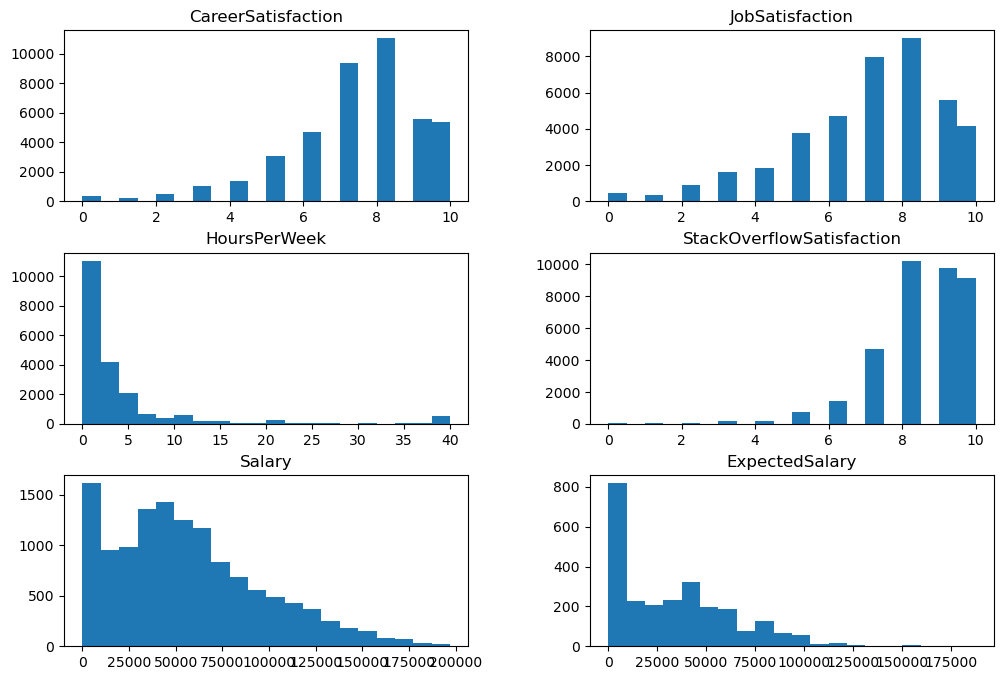

In [150]:
# Define the variable to be excluded
exclude_variable = 'Respondent'

# Drop the specified column from the DataFrame
df_excluded = df.drop(columns=[exclude_variable])

def plot_histogram(dataframe, figsize=(12, 8), bins=20, grid=False):
    """
    Plot histogram for the specified DataFrame.

    Parameters:
    - df_excluded: The DataFrame for which the histogram will be plotted.
    - figsize (tuple, optional): Figure size (width, height). Default is (12, 8).
    - bins (int or sequence, optional): Number of bins or bin edges. Default is 20.
    - grid (bool, optional): Whether to show grid lines. Default is False.

    Returns:
    - histogram
    """
    dataframe.hist(figsize=figsize, bins=bins, grid=grid)

# Plot histogram for the modified DataFrame
plot_histogram(df_excluded)


# Data Preparation

## Handle Missing Data
Imputing standard deviation of a categorical Value Continent

In [151]:
def impute_missing_values_by_continent(dataframe, numerical_columns):
    """
    Impute missing values in specified numerical columns using the standard deviation
    within each 'Continent' group.

    Parameters:
    - df: The DataFrame containing the data.
    - numerical_columns (list): List of numerical column names with missing data.

    Returns:
    - None
    """
    # Iterate over each column with missing values
    for column in numerical_columns:
        # Calculate the standard deviation within each 'continent' group
        continent_std_dev = dataframe.groupby('Continent')[column].std()
        
        # Impute missing values within each 'continent' group using the calculated standard deviation
        dataframe[column].fillna(dataframe['Continent'].map(continent_std_dev), inplace=True)

    # Print a message indicating that missing values have been handled
    print("Missing values handled using standard deviation by continent")

# Call the function with your DataFrame and list of numerical columns
impute_missing_values_by_continent(df, ['Salary', 'ExpectedSalary', 'JobSatisfaction', 'CareerSatisfaction', 'HoursPerWeek', 'StackOverflowSatisfaction'])


Missing values handled using standard deviation by continent


In [152]:
# Handle remaining missing values

df['Salary'] = df['Salary'].fillna(df['Salary'].std())
df['ExpectedSalary'] = df['ExpectedSalary'].fillna(df['ExpectedSalary'].std())


### Question 1: What are the most popular programming languages in the continents?
Understanding the regional variations in programming language preferences is crucial for businesses, educational institutions, and developers seeking to stay informed and make strategic decisions. In this context, we delve into the 2017 Stack Overflow survey data to analyze and present the most popular programming languages across various continents. By doing so, we aim to provide a nuanced perspective on how different regions embrace and prioritize programming languages, shedding light on the dynamic nature of the global software development landscape

In [153]:
# Split data to remain with the first language selected
df['HaveWorkedLanguage'] = df['HaveWorkedLanguage'].str.split(';').str[0]

C:\Users\bonzoi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bonzoi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bonzoi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bonzoi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

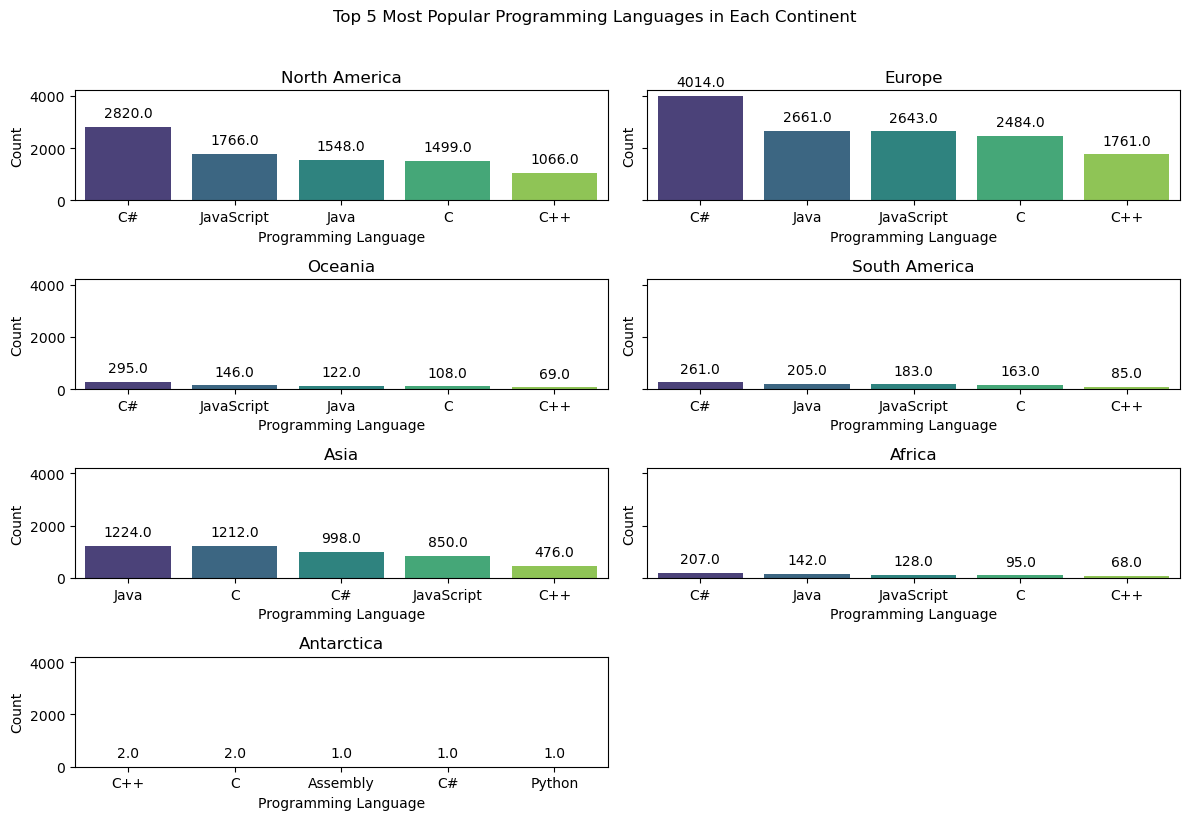

In [154]:
def plot_top_languages_by_continent(dataframe):
    """
    Plot a bar chart for the top 5 most popular programming languages in each continent.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame containing the data.

    Returns:
    - None
    """
    # Suppress warnings during the execution of the pair plot
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

    # Get unique continents in the DataFrame
    continents = dataframe['Continent'].unique()

    # Set the number of rows and columns for subplots
    num_rows = len(continents) // 2 + len(continents) % 2
    num_cols = 2

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8), sharey=True)

    # Set the spacing between subplots
    plt.subplots_adjust(hspace=0.5)

    fig.suptitle('Top 5 Most Popular Programming Languages in Each Continent', y=1.02)

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Plot a bar chart for the top 5 programming languages in each continent
    for i, continent in enumerate(continents):
        # Subset the data for the current continent
        subset_data = dataframe[dataframe['Continent'] == continent]
        
        # Find the top 5 most popular programming languages in the continent
        top_languages_continent = subset_data['HaveWorkedLanguage'].value_counts().nlargest(5).index
        
        # Plot a bar chart for the top 5 programming languages in the current continent
        sns.countplot(x='HaveWorkedLanguage', data=subset_data, order=top_languages_continent, ax=axes[i], palette='viridis')
        axes[i].set_title(f'{continent}')
        axes[i].set_xlabel('Programming Language')
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x')
        
        # Add data labels
        for p in axes[i].patches:
            axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Remove any empty subplots
    for i in range(len(continents), num_rows * num_cols):
        fig.delaxes(axes[i])

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame
plot_top_languages_by_continent(df)


## Handling Categorical variables

In [155]:
# Select features and target variable
base_input = ['Professional','Continent', 'ExpectedSalary', 'Salary', 'HoursPerWeek','CareerSatisfaction','JobSeekingStatus','AssessJobCompensation']
output = 'JobSatisfaction'

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df[base_input + [output]])

### Split the data into features (X) and target variable (y)

In [156]:
X = df_encoded.drop(output, axis=1)
y = df_encoded[output]

## Modeling:

### Selected RandomForestRegressor Model.
RandomForestRegressor is an ideal model for predicting job satisfaction across continents in this dataset due to its ability to handle non-linear relationships, its ensemble learning approach that minimizes overfitting, the provision of variable importance metrics for feature interpretation, robust performance in the presence of noise and outliers, and its capacity to capture interactions between different variables. The model's high predictive accuracy further strengthens its suitability for understanding the complex and multifaceted nature of job satisfaction influenced by various factors like professional status, expected salary, and working hours.
### Splited 30% Testing and 70% Traning.

In [157]:
def train_and_predict(X, y, test_size=0.3, random_state=42, n_estimators=100):
    """
    Split the dataset into training and testing sets, train a RandomForestRegressor model,
    and make predictions on the test set.

    Parameters:
    - X (pd.DataFrame): Features of the dataset Named base_input .
    - y (pd.Series): Target variable of the dataset output.
    - test_size (float, optional): Proportion of the dataset to include in the test split. Default is 0.3.
    - random_state (int, optional): Seed used by the random number generator. Default is 42.
    - n_estimators (int, optional): Number of trees in the forest. Default is 100.

    Returns:
    - tuple: (model, X_train, X_test, y_train, y_test, y_pred)
      - model: Trained RandomForestRegressor model.
      - X_train, X_test, y_train, y_test: Split datasets for training and testing.
      - y_pred: Predictions on the test set.
    """
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize RandomForestRegressor model
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)

    # Train the model using training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    return model, X_train, X_test, y_train, y_test, y_pred

trained_model, X_train, X_test, y_train, y_test, y_pred = train_and_predict(X, y)


# Evaluate the model's performance

In [158]:
# using mean_squared_error to evaliate performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# using r2 to evaliate performance
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 2.6806755002170046
R-squared: 0.6425413986438764


# Visualization

### Question 2: Can we predict a developer's job satisfaction in their continent Considering Professional, Continent, Expected Salary, Salary, Hours Per Week, Career Satisfaction, Job Seeking Status, Assess Job Compensation?
Job satisfaction is a complex element shaped by diverse factors. By utilizing variables like Professional background, Continent, Anticipated Salary, Current Salary, Weekly Working Hours, Career Satisfaction, Job Seeking Status, and Job Compensation Assessment, our goal is to construct a predictive model capable of anticipating a developer’s job satisfaction within their specific continents. This examination seeks to provide valuable perspectives for both employers and developers, offering guidance for talent retention strategies and enhancements in the work environment.

C:\Users\bonzoi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bonzoi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bonzoi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bonzoi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

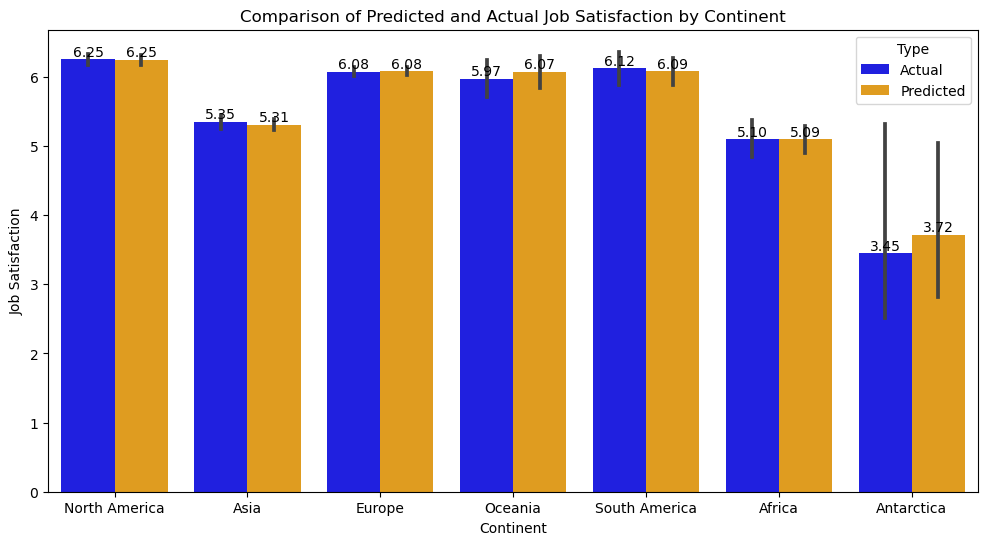

In [159]:
def plot_predicted_vs_actual_job_satisfaction(y_test, y_pred, df):
    """
    Create a clustered bar plot comparing actual vs predicted job satisfaction values by continent.

    Parameters:
    - y_test (pd.Series): Actual job satisfaction values.
    - y_pred (pd.Series): Predicted job satisfaction values.
    - df (pd.DataFrame): The DataFrame containing the continent information.

    Returns:
    - Comparison of Predicted and Actual Job Satisfaction by Continent
    """
    # Suppress warnings during the execution of the pair plot
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

    # Create a DataFrame with actual values, predicted values, and continent
    compe_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Continent': df.loc[y_test.index, 'Continent']})

    # Melt the DataFrame to create a 'variable' column for 'Actual' and 'Predicted'
    melted_Output_df = pd.melt(compe_df, id_vars=['Continent'], value_vars=['Actual', 'Predicted'], var_name='Type', value_name='Job Satisfaction')

    # Set up the matplotlib figure
    plt.figure(figsize=(12, 6))

    # Create a clustered bar plot comparing actual vs predicted by continent
    sns.barplot(x='Continent', y='Job Satisfaction', hue='Type', data=melted_Output_df, palette=['blue', 'orange'])

    # Add data labels to each bar
    for p in plt.gca().patches:
        plt.gca().text(p.get_x() + p.get_width() / 2, p.get_height(), f'{p.get_height():.2f}', ha='center', va='bottom')

    # Customize the plot
    plt.title('Comparison of Predicted and Actual Job Satisfaction by Continent')
    plt.xlabel('Continent')
    plt.ylabel('Job Satisfaction')
    plt.legend(title='Type')

    # Show the plot
    plt.show()

# Call the function with your actual values (y_test), predicted values (y_pred), and DataFrame (df)
plot_predicted_vs_actual_job_satisfaction(y_test, y_pred, df)


### Question 3: Can we predict a developer's job satisfaction in their continent Considering Professional, Continent, Expected Salary, Salary, Hours Per Week, Career Satisfaction, Job Seeking Status, Assess Job Compensation?
Taking a granular approach, we extend our analysis to predict job satisfaction based on professional characteristics. By considering Professional, Continent, Expected Salary, Salary, Hours Per Week, Career Satisfaction, Job Seeking Status and Assess Job Compensation, we aim to uncover patterns and correlations that can contribute to a deeper understanding of the factors influencing job satisfaction within specific professional roles. This information is pivotal for shaping career development programs and optimizing professional fulfillment.

C:\Users\bonzoi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bonzoi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bonzoi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bonzoi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

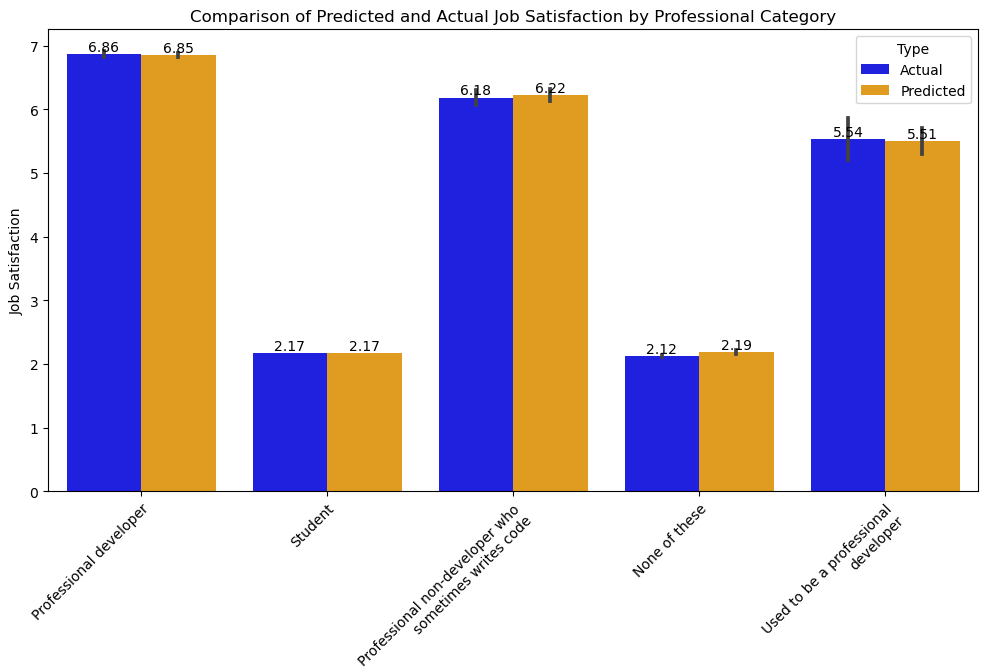

In [160]:
def plot_predicted_vs_actual_job_satisfaction_by_professional(y_test, y_pred, df):
    """
    Create a clustered bar plot comparing actual vs predicted job satisfaction values by professional category.

    Parameters:
    - y_test (pd.Series): Actual job satisfaction values.
    - y_pred (pd.Series): Predicted job satisfaction values.
    - df (pd.DataFrame): The DataFrame containing the professional category information.

    Returns:
    - None
    """
    # Create a DataFrame with actual values, predicted values, and professional category
    compe_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Professional': df.loc[y_test.index, 'Professional']})

    # Melt the DataFrame to create a 'variable' column for 'Actual' and 'Predicted'
    melted_Output_df = pd.melt(compe_df, id_vars=['Professional'], value_vars=['Actual', 'Predicted'], var_name='Type', value_name='Job Satisfaction')

    # Set up the matplotlib figure
    plt.figure(figsize=(12, 6))

    # Create a clustered bar plot comparing actual vs predicted by professional category
    sns.barplot(x='Professional', y='Job Satisfaction', hue='Type', data=melted_Output_df, palette=['blue', 'orange'])

    # Add data labels to each bar
    for p in plt.gca().patches:
        plt.gca().text(p.get_x() + p.get_width() / 2, p.get_height(), f'{p.get_height():.2f}', ha='center', va='bottom')

    # Rotate and wrap x-axis text
    plt.xticks(rotation=45, ha='right', rotation_mode='anchor', wrap=True)

    # Customize the plot
    plt.title('Comparison of Predicted and Actual Job Satisfaction by Professional Category')
    plt.xlabel('Professional Category')
    plt.ylabel('Job Satisfaction')
    plt.legend(title='Type')

    # Show the plot
    plt.show()

# Call the function with your actual values (y_test), predicted values (y_pred), and DataFrame (df)
plot_predicted_vs_actual_job_satisfaction_by_professional(y_test, y_pred, df)
